# This notebook shows a visualization of the vehicle features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib notebook
%autosave 10

In [2]:
np.random.seed(101) # Setting random state for uniform results

# Enter the dataset path here...

In [3]:
dataset_path = "../Dataset/train/" # Change to any valid path
datasets = os.listdir(dataset_path)
index = np.random.randint(0,len(datasets)) # Selecting a random file
dataset = os.path.join(dataset_path,datasets[index])
print("Visualizing Dataset: ",dataset)

Visualizing Dataset:  ../Dataset/train/129.csv


In [4]:
if dataset[-4:] == '.csv':
    df = pd.read_csv(dataset)
else:
    df = pd.read_excel(dataset)

C:\Users\Dell\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Constants: DO NOT MODIFY

In [6]:
# Columns Representing faults
fault_code1 = "column27"
fault_code2 = "column28"
VDM_Fault = "column64"
BMS_Status_1 = "column48"
BMS_Status_2 = "column49"
BMS_RELAY_STATE = "column24"
BMS_FAILSAFE_STATUS = "column39"

# Enter the feature and fault you want to visualize (Refer the legend)

In [36]:
feature = "column3" # Change to any other feature
fault = fault_code1 # Any one of the above 7 constants
code = 32768 # Enter the fault value by referring the legend

# Time Series Plot

<IPython.core.display.Javascript object>


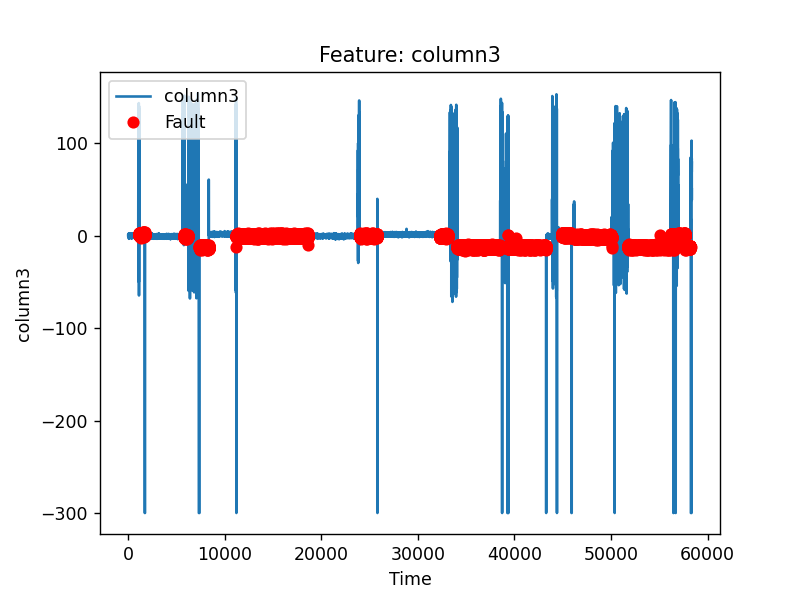

In [37]:
plt.figure()
plt.plot(df[feature])
plt.plot(df[df[fault] & code == code][feature],'ro')
plt.title("Feature: "+ feature)
plt.xlabel("Time")
#plt.yticks(range(0,70,5))
plt.ylabel(feature)
plt.legend((feature,"Fault"),loc='upper left')

# Scatter Plot

<IPython.core.display.Javascript object>


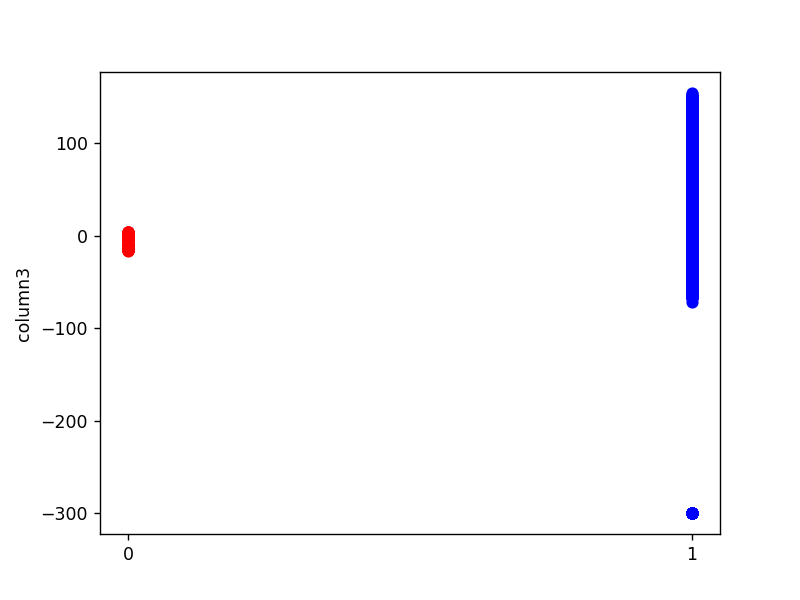

([<matplotlib.axis.XTick at 0x259dfd1bf10>,
 [Text(0, 0, ''), Text(0, 0, '')])

In [48]:
plt.figure()
df_faulty = df[df[fault] & code == code][feature]
df_non_faulty = df[df[fault] & code == 0][feature]
plt.plot(np.zeros(len(df_faulty)),df_faulty,'ro')
plt.plot(np.ones(len(df_non_faulty)),df_non_faulty,'bo')
plt.ylabel(feature)
plt.xticks(range(0,2))

# Enter a pair of features and a fault

<IPython.core.display.Javascript object>


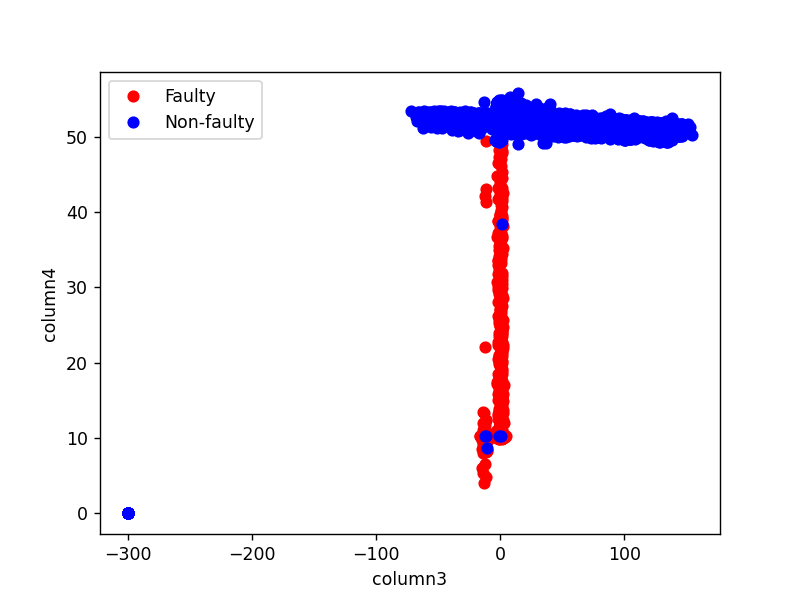

In [49]:
features = ("column3","column4") # Enter any pair of features
df_faulty = df[df[fault] & code == code]
df_non_faulty = df[df[fault] & code == 0]
plt.figure()
plt.plot(df_faulty[features[0]],df_faulty[features[1]],'ro')
plt.plot(df_non_faulty[features[0]],df_non_faulty[features[1]],'bo')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(("Faulty","Non-faulty"))

# Remarks:

It can be observed that for most of the faults and vehicles, the current and voltage are the features which are affected by the activation of any fault. So, the current and voltage seem to be the most important features.

We need to do a correlation test to find out the other features which are most correlated with these features.

This can be used in selecting subsets of features while training the model.

In [57]:
fig = plt.figure(figsize=(60,60))
sns.heatmap(df.corr(),annot=True)
plt.savefig("corr.png")

<IPython.core.display.Javascript object>